In [ ]:
import pandas as pd
nexd=pd.read_csv('/content/kona-electric.csv')

In [ ]:
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords

def clean_stopwords_shortwords(w):
    stopwords_list=stopwords.words('english')
    words = w.split() 
    clean_words = [word for word in words if (word not in stopwords_list) and len(word) > 2]
    return " ".join(clean_words) 

#Combined function that will be called to preprocess our text data
def preprocess_sentence(w):
    #lowercase all the text
    w = w.lower()
    #Remove puntuations
    w = re.sub(r'[^\w\s]', '', w)
    w = re.sub(r"([?.!,¿])", r" ", w)
    w = re.sub(r'[" "]+', " ", w)
    w = re.sub(r"[^a-zA-Z?.!,¿]+", " ", w)
    #Calling stopword function
    w=clean_stopwords_shortwords(w)
    return w

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
nexd['Preprocessed_Review']=nexd['Review'].map(preprocess_sentence)

In [ ]:
def Range(sent):
  if 'range' in sent:ans = sent
  else:ans = None
  return ans

def Battery(sent):
  if 'battery' in sent:ans = sent
  else:ans = None
  return ans

def Power(sent):
  if 'power' in sent:ans = sent
  else:ans = None
  return ans

def Performance(sent):
  if 'performance' in sent:ans = sent
  else:ans = None
  return ans

def Comfort(sent):
  if 'comfort' in sent:ans = sent
  else:ans = None
  return ans

luggage = ['space', 'luggage', 'volume', 'bootspace', 'diggi']
def Space(sent):
  for i in luggage:
    if 'space' in sent:ans = sent
    else:ans = None
  return ans

def Storage(sent):
  if 'storage' in sent:ans = sent
  else:ans = None
  return ans

def Fcar(sent):
  if "first" in sent:ans = sent
  else:ans = None
  return ans

In [ ]:
nexd['range']=nexd['Preprocessed_Review'].map(Range)
nexd['battery']=nexd['Preprocessed_Review'].map(Battery)
nexd['power']=nexd['Preprocessed_Review'].map(Power)
nexd['performance']=nexd['Preprocessed_Review'].map(Performance)
nexd['comfort']=nexd['Preprocessed_Review'].map(Comfort)
nexd['space']=nexd['Preprocessed_Review'].map(Space)
nexd['storage']=nexd['Preprocessed_Review'].map(Storage)
nexd['FirstCar']=nexd['Preprocessed_Review'].map(Fcar)

In [ ]:
!pip install textblob
from textblob import TextBlob
def calculate_sentiment(review):
  text = TextBlob(review)
  return text.sentiment.polarity

def getAnalysis(score):
  if score < 0:
    return "Negative"
  elif score == 0:
    return "Neutral"
  else:
    return "Positive"

In [ ]:
nexd['Score']=nexd['Review'].map(calculate_sentiment)
nexd['Sentiment']=nexd['Score'].map(getAnalysis)

In [ ]:
Range_df = nexd[['range', 'Review', 'Score', 'Sentiment']]

In [ ]:
import numpy as np
Range_df = Range_df.replace(to_replace='None', value=np.nan).dropna()

In [ ]:
Range_df.range.count()

16

In [ ]:
Range = nexd.Preprocessed_Review.str.split(expand=True).stack().value_counts().range
Battery = nexd.Preprocessed_Review.str.split(expand=True).stack().value_counts().battery
Power = nexd.Preprocessed_Review.str.split(expand=True).stack().value_counts().power
Performance = nexd.Preprocessed_Review.str.split(expand=True).stack().value_counts().performance
comfort = nexd.Preprocessed_Review.str.split(expand=True).stack().value_counts().comfort
space = nexd.Preprocessed_Review.str.split(expand=True).stack().value_counts().space
FirstCar = nexd.Preprocessed_Review.str.split(expand=True).stack().value_counts().first

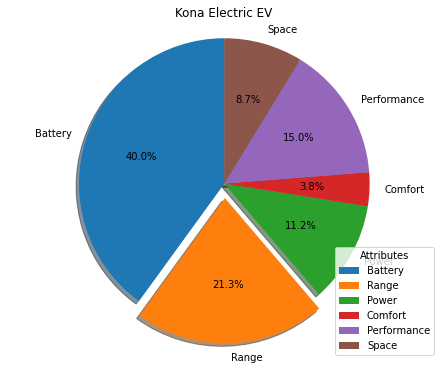

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
labels = ['Battery', 'Range', 'Power', 'Comfort', 'Performance', 'Space']
x = [Battery, Range, Power, comfort, Performance, space]

plt.pie(x, labels=labels, autopct='%1.1f%%', explode=[0,0.1,0,0,0,0], shadow=True, startangle=90)
plt.title('Kona Electric EV')
plt.legend(title="Attributes", loc="lower right")
plt.axis('equal')
plt.subplots_adjust(left=0, bottom=0.1, right=1)
fig = plt.gcf()
fig.set_size_inches(6,6)
plt.show()

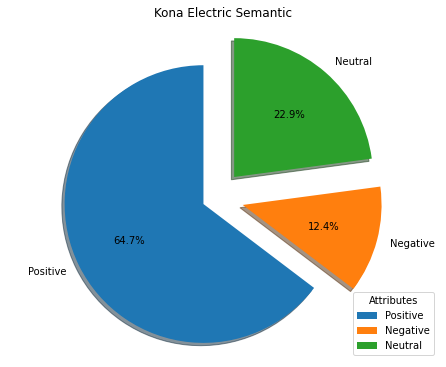

In [ ]:
Positive = nexd.Sentiment.str.split(expand=True).stack().value_counts().Positive
try:Negative = nexd.Sentiment.str.split(expand=True).stack().value_counts().Negative
except:Negative = 0
try:Neutral = nexd.Sentiment.str.split(expand=True).stack().value_counts().Neutral
except:Neutral = 0
labels = ['Positive', 'Negative', 'Neutral']
x = [Positive, Negative, Neutral]

plt.pie(x, labels=labels, autopct='%1.1f%%', explode=[0.1, 0.2, 0.2], shadow=True, startangle=90)
plt.title('Kona Electric Semantic')
plt.legend(title="Attributes", loc="lower right")
plt.axis('equal')
plt.subplots_adjust(left=0, bottom=0.1, right=1)
fig = plt.gcf()
fig.set_size_inches(6,6)
plt.show()

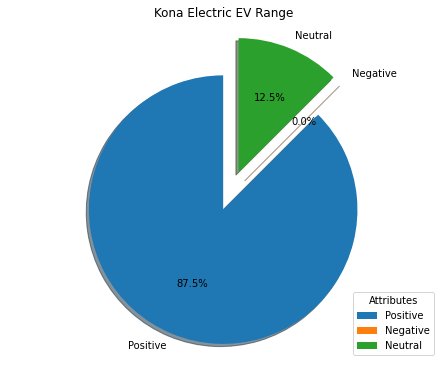

In [ ]:
Positive = Range_df.Sentiment.str.split(expand=True).stack().value_counts().Positive
try:
  Negative = Range_df.Sentiment.str.split(expand=True).stack().value_counts().Negative
except:
  Negative = 0
try:
  Neutral = Range_df.Sentiment.str.split(expand=True).stack().value_counts().Neutral
except:
  Neutral = 0
labels = ['Positive', 'Negative', 'Neutral']
x = [Positive, Negative, Neutral]

plt.pie(x, labels=labels, autopct='%1.1f%%', explode=[0.1, 0.2,0.2 ], shadow=True, startangle=90)
plt.title('Kona Electric EV Range')
plt.legend(title="Attributes", loc="lower right")
plt.axis('equal')
plt.subplots_adjust(left=0, bottom=0.1, right=1)
fig = plt.gcf()
fig.set_size_inches(6,6)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


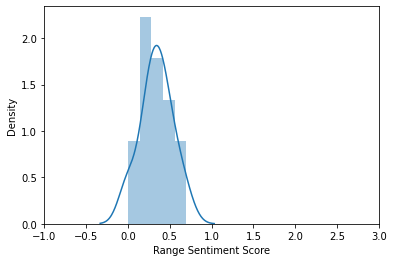

In [ ]:
sns.distplot(Range_df['Score'])
plt.xlim([-1, 3]);
plt.xlabel('Range Sentiment Score');

In [ ]:
Range_df=Range_df.sort_values(by = 'Score')

TOP3 Range(Positive)

In [ ]:
Range_df.tail(3)

,range,Review,Score,Sentiment
163,one best car available india good range price ...,One of the best EV car available in India with...,0.553333,Positive
123,best car ever owned paradigm shift automotive ...,Best car I have ever owned. A paradigm shift i...,0.594444,Positive
137,hyundai claims combination good arai test cond...,Hyundai claims this combination is good for 34...,0.700000,Positive


In [ ]:
Battery_df = nexd[['battery', 'Review', 'Score', 'Sentiment']]
Battery_df = Battery_df.replace(to_replace='None', value=np.nan).dropna()
Battery_df.battery.count()

28

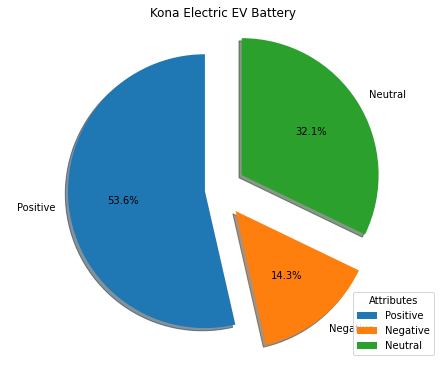

In [ ]:
Positive = Battery_df.Sentiment.str.split(expand=True).stack().value_counts().Positive

try:Neutral = Battery_df.Sentiment.str.split(expand=True).stack().value_counts().Neutral
except:Neutral =0
try:Negative = Battery_df.Sentiment.str.split(expand=True).stack().value_counts().Negative
except:Negative=0
labels = ['Positive', 'Negative', 'Neutral']
x = [Positive, Negative, Neutral]

plt.pie(x, labels=labels, autopct='%1.1f%%', explode=[0.1, 0.2, 0.2], shadow=True, startangle=90)
plt.title('Kona Electric EV Battery')
plt.legend(title="Attributes", loc="lower right")
plt.axis('equal')
plt.subplots_adjust(left=0, bottom=0.1, right=1)
fig = plt.gcf()
fig.set_size_inches(6,6)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


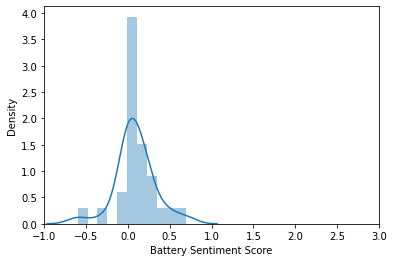

In [ ]:
sns.distplot(Battery_df['Score'])
plt.xlim([-1, 3]);
plt.xlabel('Battery Sentiment Score');

Top3 Battery Negative

In [ ]:
Battery_df=Battery_df.sort_values(by = 'Score')
Battery_df.head(3)

,battery,Review,Score,Sentiment
60,flip side believe india spec car wont get batt...,"On the flip side, I believe the India spec ca...",-0.600000,Negative
30,however future depending regional demand kona ...,"However, in the future depending on regional ...",-0.300000,Negative
74,black plastic cladding sides makes rugged appe...,The black plastic cladding on the sides makes...,-0.083333,Negative


TOP 3 battery(Positive)


In [ ]:
Battery_df.tail(3)

,battery,Review,Score,Sentiment
157,amazing give best performance battery backup a...,Its so amazing and they give best performance....,0.421429,Positive
113,amazingamazing fully electric car amazing powe...,"Amazing,Amazing Fully electric car with amazin...",0.500000,Positive
32,however battery good charging cycles amount go...,"However, this battery is good for some 2,000 ...",0.700000,Positive


Top3 Power (Negative)

In [ ]:
Power_df = nexd[['power', 'Review', 'Score', 'Sentiment']]
Power_df = Power_df.replace(to_replace='None', value=np.nan).dropna()
Power_df.power.count()

16

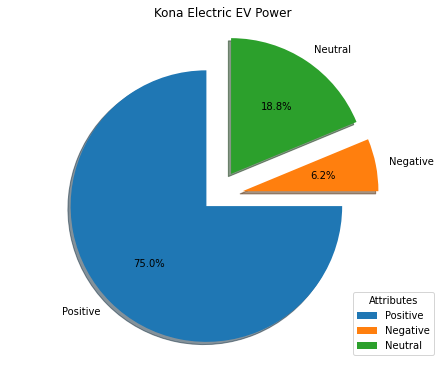

In [ ]:

Positive = Power_df.Sentiment.str.split(expand=True).stack().value_counts().Positive
try:Negative = Power_df.Sentiment.str.split(expand=True).stack().value_counts().Negative
except:Negative=0
try:Neutral= Power_df.Sentiment.str.split(expand=True).stack().value_counts().Neutral
except:Neutral=0
labels = ['Positive', 'Negative', 'Neutral']
x = [Positive, Negative, Neutral]

plt.pie(x, labels=labels, autopct='%1.1f%%', explode=[0.1, 0.2, 0.2], shadow=True, startangle=90)
plt.title('Kona Electric EV Power')
plt.legend(title="Attributes", loc="lower right")
plt.axis('equal')
plt.subplots_adjust(left=0, bottom=0.1, right=1)
fig = plt.gcf()
fig.set_size_inches(6,6)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


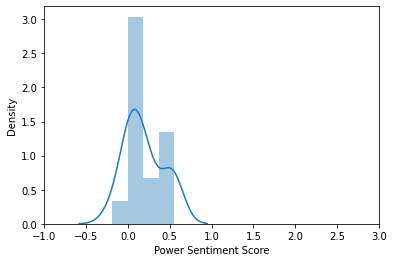

In [ ]:
sns.distplot(Power_df['Score'])
plt.xlim([-1, 3]);
plt.xlabel('Power Sentiment Score');

top 3 Power (Negative)

In [ ]:
Power_df=Power_df.sort_values(by = 'Score')
Power_df.head(3)

,power,Review,Score,Sentiment
21,driving modes allow customise power delivery e...,Driving modes allow you to customise power de...,-0.1875,Negative
100,motor mated singlespeed reduction gear one rat...,This motor is mated to a single-speed reducti...,0.0000,Neutral
108,kwh battery instead kwh batterypowered vehicle...,2kWh battery instead of the 64kWh battery-powe...,0.0000,Neutral


Top 3 Power(Positive) 

In [ ]:
Power_df.tail(3)

,power,Review,Score,Sentiment
132,everything premium car seats suspension drivet...,Everything is premium about the car the seats ...,0.500000,Positive
193,using last month gentlelooking beast pickup po...,Using it for the last 1 month. It's a gentle-l...,0.550000,Positive
163,one best car available india good range price ...,One of the best EV car available in India with...,0.553333,Positive


Performance

In [ ]:
Performance_df = nexd[['performance', 'Review', 'Score', 'Sentiment']]
Performance_df = Performance_df.replace(to_replace='None', value=np.nan).dropna()
Performance_df.performance.count()

11

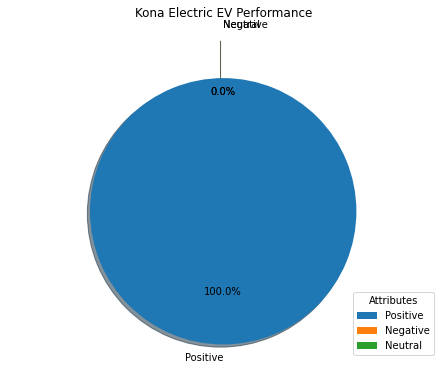

In [ ]:

Positive = Performance_df.Sentiment.str.split(expand=True).stack().value_counts().Positive
try:Negative = Performance_df.Sentiment.str.split(expand=True).stack().value_counts().Negative
except:Negative=0
try:Neutral = Performance_df.Sentiment.str.split(expand=True).stack().value_counts().Neutral
except:Neutral=0
labels = ['Positive', 'Negative', 'Neutral']
x = [Positive, Negative, Neutral]

plt.pie(x, labels=labels, autopct='%1.1f%%', explode=[0.1, 0.2, 0.2], shadow=True, startangle=90)
plt.title('Kona Electric EV Performance')
plt.legend(title="Attributes", loc="lower right")
plt.axis('equal')
plt.subplots_adjust(left=0, bottom=0.1, right=1)
fig = plt.gcf()
fig.set_size_inches(6,6)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


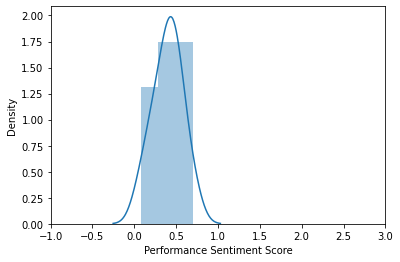

In [ ]:
sns.distplot(Performance_df['Score'])
plt.xlim([-1, 3]);
plt.xlabel('Performance Sentiment Score');

In [ ]:
Performance_df=Performance_df.sort_values(by = 'Score')

In [ ]:
Performance_df.tail(3)

,performance,Review,Score,Sentiment
135,good experience good driving experience perfor...,Good experience good driving experience all pe...,0.544444,Positive
193,using last month gentlelooking beast pickup po...,Using it for the last 1 month. It's a gentle-l...,0.550000,Positive
112,good cari really buy excellent car hyundai bes...,All off good in this car.i really about to buy...,0.700000,Positive


Comfort

In [ ]:
comfort_df = nexd[['comfort', 'Review', 'Score', 'Sentiment']]
comfort_df = comfort_df.replace(to_replace='None', value=np.nan).dropna()
comfort_df.comfort.count()

12

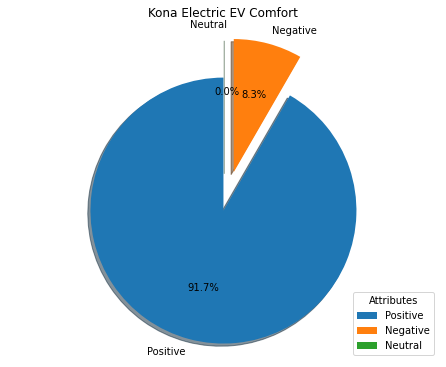

In [ ]:
Positive = comfort_df.Sentiment.str.split(expand=True).stack().value_counts().Positive
try:Negative = comfort_df.Sentiment.str.split(expand=True).stack().value_counts().Negative
except:Negative=0
try:Neutral = comfort_df.Sentiment.str.split(expand=True).stack().value_counts().Neutral
except:Neutral=0
labels = ['Positive', 'Negative', 'Neutral']
x = [Positive, Negative, Neutral]

plt.pie(x, labels=labels, autopct='%1.1f%%', explode=[0.1, 0.2, 0.2], shadow=True, startangle=90)
plt.title('Kona Electric EV Comfort')
plt.legend(title="Attributes", loc="lower right")
plt.axis('equal')
plt.subplots_adjust(left=0, bottom=0.1, right=1)
fig = plt.gcf()
fig.set_size_inches(6,6)
plt.show()




/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


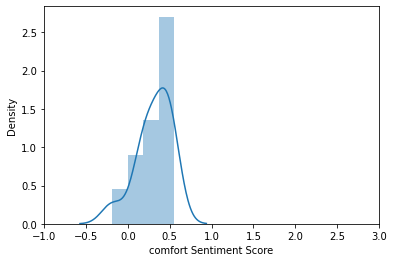

In [ ]:
sns.distplot(comfort_df['Score'])
plt.xlim([-1, 3]);
plt.xlabel('comfort Sentiment Score');

Top3 Comfort Negative

In [ ]:
comfort_df=comfort_df.sort_values(by = 'Score')
comfort_df.head(3)

,comfort,Review,Score,Sentiment
21,driving modes allow customise power delivery e...,Driving modes allow you to customise power de...,-0.187500,Negative
147,bought electric car months back driven kms run...,"I bought this electric car 2 months back, driv...",0.138357,Positive
79,interiors comfortable enough space middle row ...,"The interiors are very comfortable, there is ...",0.144074,Positive


Top3 comfort Positive


In [ ]:
comfort_df.tail(3)

,comfort,Review,Score,Sentiment
148,like car much car comfortable love car riding ...,I like this car very much. Because this car is...,0.477917,Positive
194,good performance silent engine sound amazing i...,"Very good performance, silent engine sound, am...",0.498333,Positive
156,new electric car hyundai fully loaded features...,Its new electric car of Hyundai fully loaded w...,0.552121,Positive


SPACE

In [ ]:
space_df = nexd[['space', 'Review', 'Score', 'Sentiment']]
space_df = space_df.replace(to_replace='None', value=np.nan).dropna()
space_df.space.count()

5

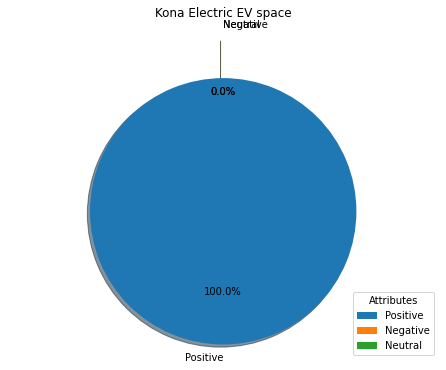

In [ ]:
Positive = space_df.Sentiment.str.split(expand=True).stack().value_counts().Positive
try:Negative = space_df.Sentiment.str.split(expand=True).stack().value_counts().Negative
except:Negative=0
try:Neutral = space_df.Sentiment.str.split(expand=True).stack().value_counts().Neutrtal
except:Neutral=0
labels = ['Positive', 'Negative', 'Neutral']
x = [Positive, Negative, Neutral]

plt.pie(x, labels=labels, autopct='%1.1f%%', explode=[0.1, 0.2, 0.2], shadow=True, startangle=90)
plt.title('Kona Electric EV space')
plt.legend(title="Attributes", loc="lower right")
plt.axis('equal')
plt.subplots_adjust(left=0, bottom=0.1, right=1)
fig = plt.gcf()
fig.set_size_inches(6,6)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


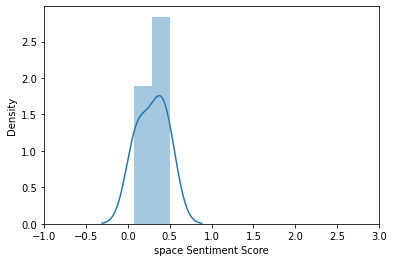

In [ ]:
sns.distplot(space_df['Score'])
plt.xlim([-1, 3]);
plt.xlabel('space Sentiment Score');

In [ ]:
space_df=space_df.sort_values(by = 'Score')

In [ ]:
space_df.tail(3)

,space,Review,Score,Sentiment
11,boot space adequate well,Boot space is adequate as well,0.333333,Positive
47,terms space front seats spacious comfortable r...,"In terms of space, the front seats are spacio...",0.400000,Positive
194,good performance silent engine sound amazing i...,"Very good performance, silent engine sound, am...",0.498333,Positive
